In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u, constants as c
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls *.fits

 Volume in drive C has no label.
 Volume Serial Number is B679-3090

 Directory of C:\Users\jaguirre\OneDriveDocuments\GitHub\toast_blast_sim

12/12/2022  02:39 PM        50,342,400 stokes_850_C=100_n=10_highRes.fits
               1 File(s)     50,342,400 bytes
               0 Dir(s)  198,747,058,176 bytes free


In [3]:
hdu = fits.open('stokes_850_C=100_n=10_highRes.fits')

In [4]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    6 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'PARAM   '           / type of unit 1                                 
CRVAL1  = -7.7174560546875E+18 / value of axis 1                                
CRPIX1  =                   

In [5]:
naxis1 = hdu[0].header['NAXIS1']
naxis2 = hdu[0].header['NAXIS2']
data = hdu[0].data

In [6]:
print(data.shape)
print(naxis1)

(6, 1, 1024, 1024)
1024


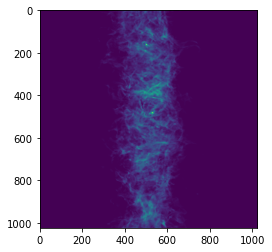

In [7]:
plt.imshow(data[5,0,:,:])

In [8]:
stokes = ['I', 'Q', 'U', 'V']

In [14]:
FoV = 4*u.deg
dx = (FoV/naxis1).to(u.deg)
print(dx.to(u.arcsec))
dx = dx.value
print(dx)

14.0625 arcsec
0.00390625


In [19]:
# Weirdly, this just does not work
#wcs = WCS(naxis=2)
#wcs.crpix = [naxis1/2, naxis2/2]
#wcs.cdelt = np.array([-dx, dx])
#wcs.crval = [180, -9]
#wcs.ctype = ['RA---TAN', 'DEC--TAN']
#header = wcs.to_header()

In [39]:
for i, s in enumerate(stokes):

    hdu_new = fits.PrimaryHDU(data[i,0,:,:])

    hdu_new.header['WCSAXES'] = 2
    hdu_new.header['CRPIX1'] = naxis1/2
    hdu_new.header['CRPIX2'] = naxis2/2
    hdu_new.header['CDELT1'] = -dx
    hdu_new.header['CDELT2'] = dx
    hdu_new.header['CUNIT1'] = 'deg'
    hdu_new.header['CUNIT2'] = 'deg'
    hdu_new.header['CTYPE1'] = 'RA---TAN'
    hdu_new.header['CTYPE2'] = 'DEC--TAN'
    hdu_new.header['CRVAL1'] = 180.
    hdu_new.header['CRVAL2'] = -9.
    hdu_new.header['LONPOLE'] = 0.0
    hdu_new.header['LATPOLE'] = 90.0
    hdu_new.header['RADESYS'] = 'ICRS'
    
    hdu_new.writeto('BLASTObsSim_'+s+'.fits')

In [40]:
hdu_new.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
WCSAXES =                    2                                                  
CRPIX1  =                512.0                                                  
CRPIX2  =                512.0                                                  
CDELT1  =          -0.00390625                                                  
CDELT2  =           0.00390625                                                  
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '        